# Algorythme (inspired by clustered) :

The algorythme plot datas as points in a space (if you have 2 parameteres there will be 2 dimensions, if you have X parameteres there will X dimensions). If you want to have the cathegorie of a point (Y), the algorythme will find the nearest point and assign his category to the Y point. The operation is simple enough for bank fraud (example at the end).

In [13]:
class Nuage_Point:
    def __init__(self, nombre_caracteristique):
        self.point = []
        self.caracteristique = []
        self.nombre_caracteristique = nombre_caracteristique

    def ajouter_point(self, coordone =[], caracteritique = ""):
        self.point.append(coordone)
        self.caracteristique.append(caracteritique)
    def return_nombre_de_point(self):
        return len(self.point)


    def point_proche(self, pointdonne):
        self.somme = 0
        self.somme2 = 0
        self.best_caract = ""
        for x in range (0, len(self.point)):
            self.point_distance = self.point[x]
            self.somme = 0
            for y in range (0, self.nombre_caracteristique):
                self.somme = self.somme + pow((self.point_distance[y]- pointdonne[y]), 2)
            if self.somme < self.somme2 or x == 0:
                self.somme2 = self.somme
                self.best_caract = self.caracteristique[x]

        return self.best_caract

### Install matplotlib (preferably 3.6) :

In [14]:
!pip install matplotlib==3.6

2343.46s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


### Import random and pyplot from matplotlib :

In [15]:
import random
from matplotlib import pyplot as plt

# Generate data (imitating reality) :


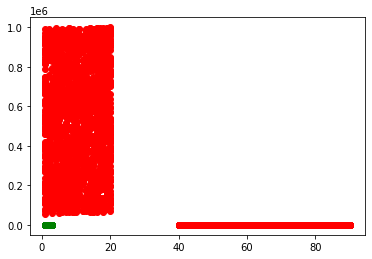

In [16]:
test = Nuage_Point(2)
for y in range (1, 2000) :
    x1 = random.randint(40, 90)

    test.ajouter_point([x1, y], "Fraud") # x = transaction per minute, y = amount
    plt.plot(x1, y, marker="o", color="red")

    x1 = random.randint(1, 20)
    y1 = random.randint (60000, 1000000)
    test.ajouter_point([x1, y1], "Fraud") # x = transaction per minute, y = amount
    plt.plot(x1, y1, marker="o", color="red")

    y2 = random.randint(6, 2000)
    x2 = random.randint(1,3)
    test.ajouter_point([x2, y2], "No Fraud")
    plt.plot(x2, y2, marker="o", color="green")

for x in range (0,10):
    y2 = random.randint(50000, 1000000)
    x2 = 1
    test.ajouter_point([x2, y2], "No Fraud")

    plt.plot(x2, y2, marker="o", color="red")

# Test :

In [28]:
XATest = float(input("Transaction per minute : "))
YATest = float(input("Amount : "))

Caracteristique = test.point_proche([XATest, YATest])
print("The transaction is : ", Caracteristique)

Transaction per minute :  120
Amount :  5


The transaction is :  Fraud


### Plot the points with pyplot :

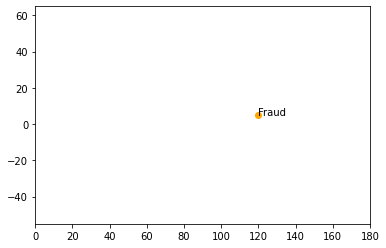

In [29]:
plt.plot(XATest, YATest, marker="o", color="orange")
plt.annotate(Caracteristique, (XATest, YATest))
plt.axis([0, XATest+60, YATest-60, YATest+60])
plt.show()